# Homogeneous Helmholtz 2D - Active Cloacking Application

#### Libraries

In [1]:
%matplotlib widget

In [2]:
import numpy as np
from numpy import log,  sin, cos, arctan2, pi, mean, dot
from numpy.linalg import norm, solve
from scipy.special import roots_legendre,hankel1
from scipy.integrate import quad
import matplotlib.pyplot as plt
import meshio
import add_funs as af

---

In [3]:
k = 4 # wavenumber

## Incident Field

In [4]:
# Screen width and height
upper_grid_size = 20
lower_grid_size = -upper_grid_size
ngrid_pts = 500

grid_vec = np.linspace(lower_grid_size,upper_grid_size,num=ngrid_pts)

X,Y = np.meshgrid(grid_vec,grid_vec)

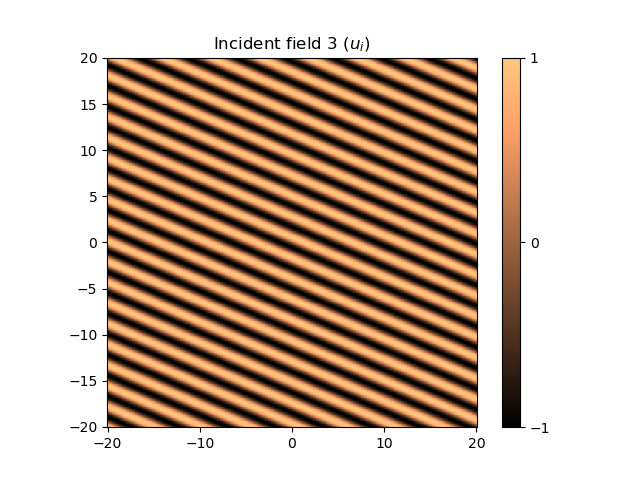

In [5]:
# Define the third field
k_ui_3 = k

alpha = 0.3 # [0 < alpha < 1] alpha changes the orientation of the incident field
beta = 1-alpha

ui_field_3 = sin(alpha*k_ui_3*X+beta*k_ui_3*Y)

# Plot the surface
plt.close('all')

fig, ax = plt.subplots()
plot = ax.pcolormesh(X, Y, ui_field_3, edgecolor="none",cmap="copper",vmin=-1, vmax=1)
ax.axis('equal')
ax.set_aspect('equal', 'box')

cbar = fig.colorbar(plot,ax=ax,ticks=[-1,0,1])
plt.title(r"Incident field 3 ($u_i$)")
plt.show()

In [6]:
def incident_field(x, y, alpha, beta, k):
   return sin(alpha*k_ui_3*X+beta*k_ui_3*Y)

## Scattering Problem

In [7]:
fname = "kite_scatterer.msh"
mesh = meshio.read(fname)

In [8]:
mesh, coords, elems, x_m, y_m, id_dir, id_neu = af.read_geo_gmsh(fname, list(range(0,len(mesh.cells))), None)

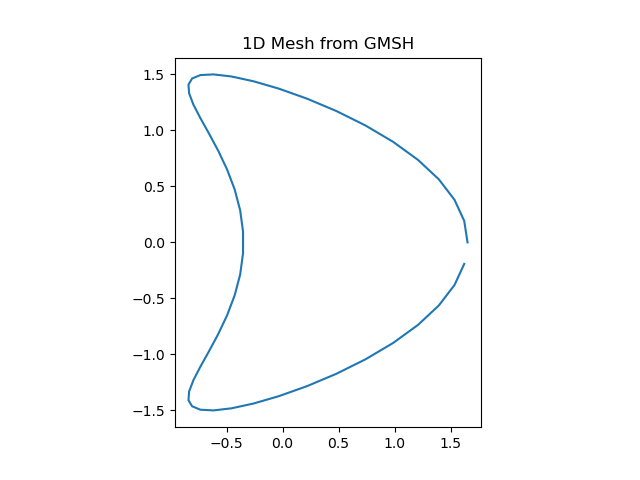

In [9]:
# Plot the surface

fig, ax = plt.subplots()
plot = ax.plot(coords[:,0], coords[:,1])
ax.axis('equal')

ax.set_aspect('equal', 'box')
plt.title(r"1D Mesh from GMSH")
plt.show()

In [10]:
Gmat, Hmat = af.assem(coords,elems,k,"external")